# Insights From FIFA World Cup Data

In [1]:
# important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [51]:
# Worldcup Data - General Info

worldcup_data = pd.read_csv('data/worldcups.csv')

worldcup_data.tail()

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
16,2002,"Japan, South Korea",Brazil,Germany,Turkey,South Korea,161,32,64,2724604
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3367000
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,2167984
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3441450
20,2018,Russia,France,Croatia,Belgium,England,169,32,64,3031768


In [52]:
worldcup_data.shape

(21, 10)

In [53]:
# Data on the Matches

worldcup_matches = pd.read_csv('data/wcmatches.csv')

worldcup_matches.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [54]:
worldcup_matches.shape

(900, 15)

# EDA

In [65]:
sns.set_theme()
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)

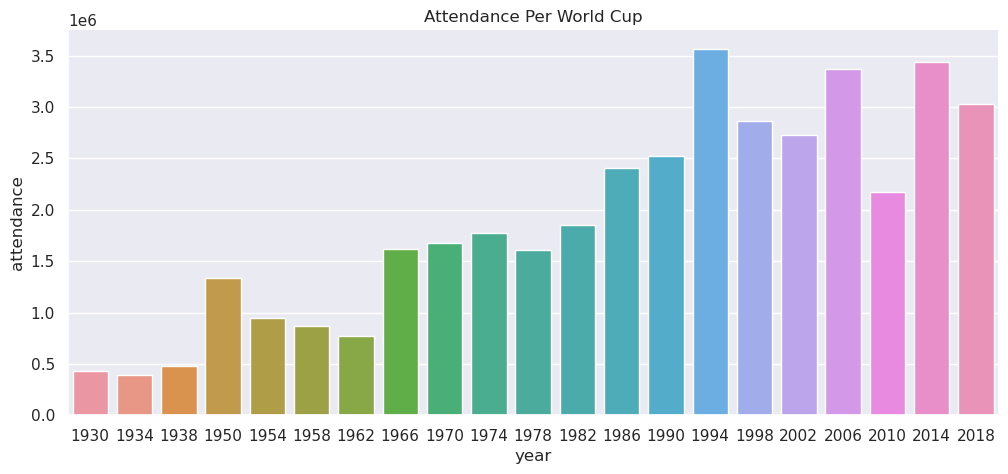

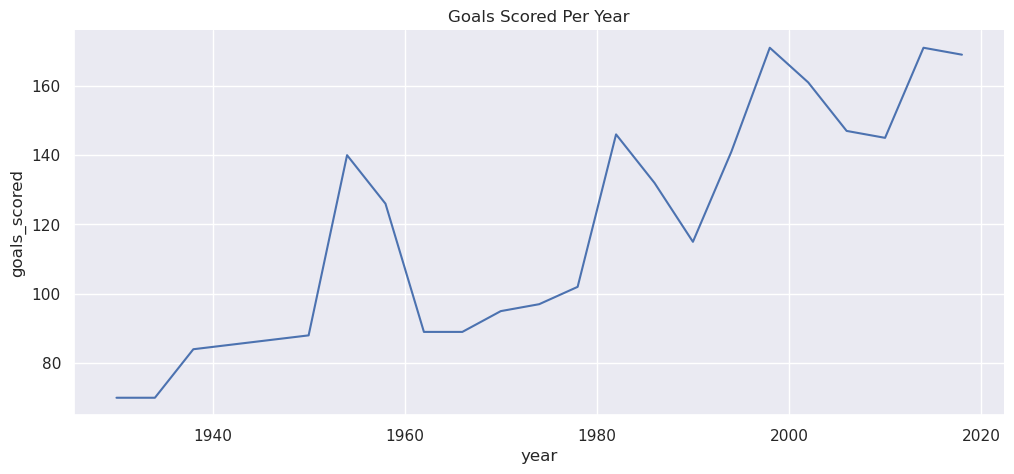

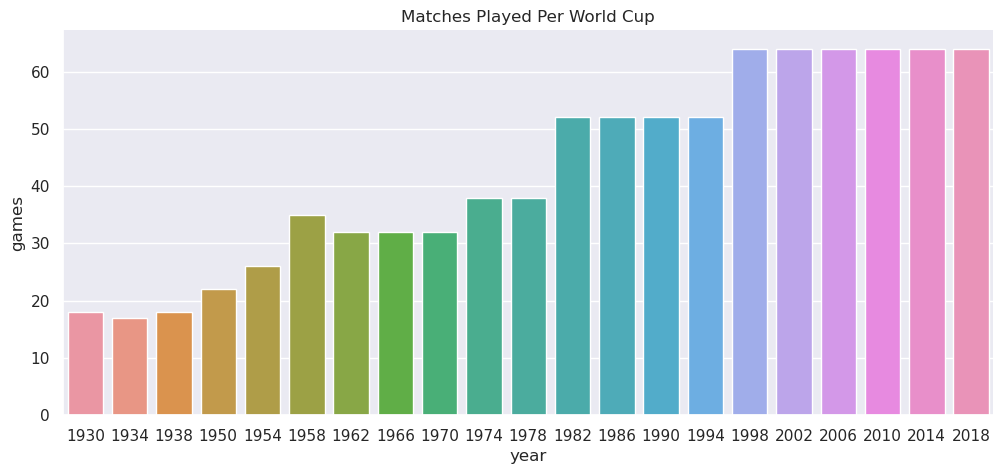

In [59]:
# Attendance per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'year', y = 'attendance', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Attendance Per World Cup')

#==========================================

# Goals Scored during the competition per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.lineplot(x = 'year', y = 'goals_scored', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Goals Scored Per Year')


#==========================================

# Matches Played Per Year

fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'year', y = 'games', data = worldcup_data)
# plt.xticks(rotation = 80)
g.set_title('Matches Played Per World Cup')

plt.show()

In [57]:
winners = worldcup_data['winner'].value_counts()
winners

Brazil          5
Italy           4
West Germany    3
Uruguay         2
Argentina       2
France          2
England         1
Spain           1
Germany         1
Name: winner, dtype: int64

In [16]:
runners_up = worldcup_data['second'].value_counts()
runners_up

Argentina         3
West Germany      3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Croatia           1
Name: second, dtype: int64

In [17]:
thirds = worldcup_data['third'].value_counts()
thirds

Germany         3
Brazil          2
Sweden          2
France          2
Poland          2
USA             1
Austria         1
Chile           1
Portugal        1
West Germany    1
Italy           1
Croatia         1
Turkey          1
Netherlands     1
Belgium         1
Name: third, dtype: int64

In [18]:
performant_teams = pd.concat([winners, runners_up, thirds], axis=1)
performant_teams.fillna(0, inplace=True)
performant_teams = performant_teams.astype(int)
performant_teams

,winner,second,third
Brazil,5,2,2
Italy,4,2,1
West Germany,3,3,1
Uruguay,2,0,0
Argentina,2,3,0
France,2,1,2
England,1,0,0
Spain,1,0,0
Germany,1,1,3
Netherlands,0,3,1


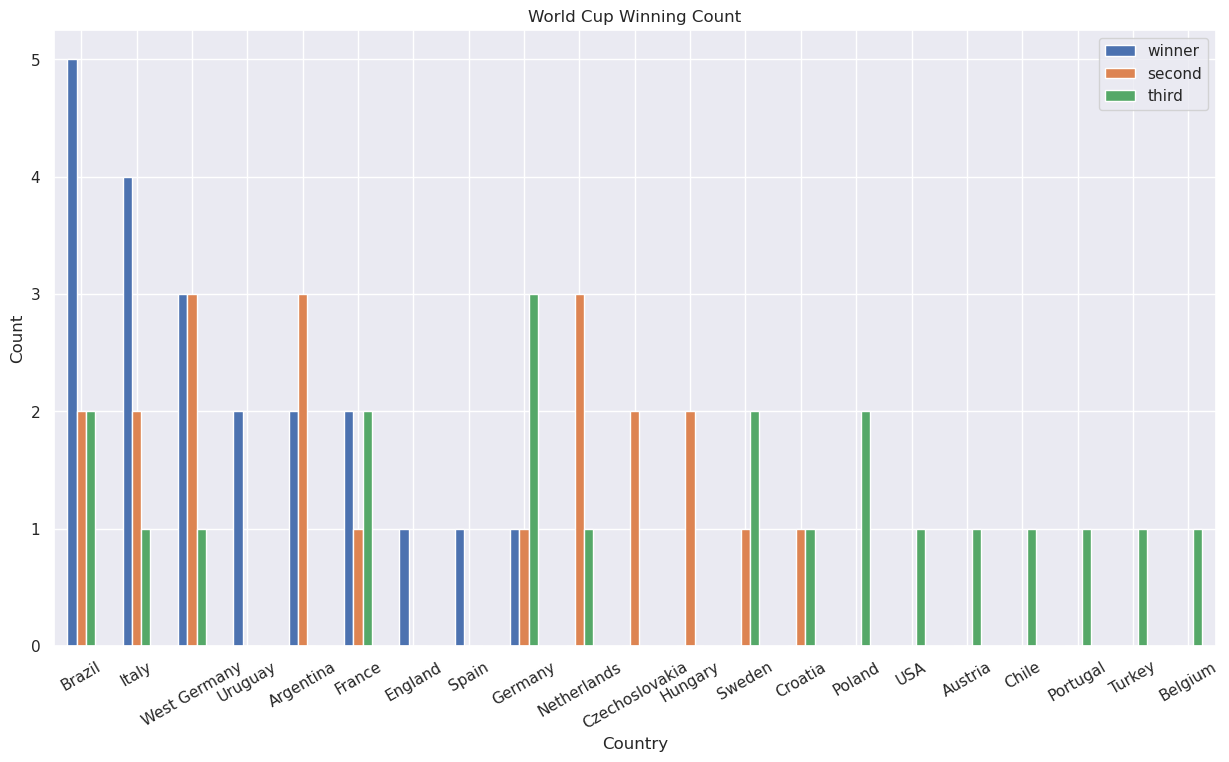

In [19]:
performant_teams[:].plot(kind="bar")

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('World Cup Winning Count')
plt.xticks(rotation=30)
plt.show()

In [ ]:
home_goals = worldcup_matches.groupby(['year', 'home_team'])['home_score'].sum()
home_goals

In [25]:
away_goals = worldcup_matches.groupby(['year', 'away_team'])['away_score'].sum()
away_goals

year  away_team  
1930  Argentina      2
      Brazil         4
      Chile          1
      France         0
      Mexico         4
                    ..
2018  Spain          5
      Sweden         4
      Switzerland    3
      Tunisia        4
      Uruguay        4
Name: away_score, Length: 403, dtype: int64

In [35]:
team_goals = pd.concat([home_goals, away_goals], axis=1)
team_goals.fillna(0, inplace=True)
team_goals['Goals'] = team_goals['home_score'] + team_goals['away_score']
team_goals



home_score  away_score  Goals
year                                         
1930 Argentina        16.0         2.0   18.0
     Belgium           0.0         0.0    0.0
     Bolivia           0.0         0.0    0.0
     Brazil            1.0         4.0    5.0
     Chile             4.0         1.0    5.0
...                    ...         ...    ...
1998 Iran              0.0         2.0    2.0
     Mexico            0.0         8.0    8.0
     Norway            0.0         5.0    5.0
     Serbia            0.0         1.0    1.0
     Tunisia           0.0         1.0    1.0

[458 rows x 3 columns]

In [36]:
team_goals = team_goals.reset_index()

In [37]:
team_goals.columns = ['Year', 'Country', 'Home Team Goals', 'Away Team Goals', 'Goals']
team_goals = team_goals.sort_values(by = ['Country', 'Year'], ascending = True)
team_goals

,Year,Country,Home Team Goals,Away Team Goals,Goals
125,1982,Algeria,3.0,2.0,5.0
144,1986,Algeria,1.0,0.0,1.0
299,2010,Algeria,0.0,0.0,0.0
331,2014,Algeria,1.0,6.0,7.0
267,2006,Angola,0.0,1.0,1.0
...,...,...,...,...,...
429,1962,Yugoslavia,0.0,10.0,10.0
110,1974,Yugoslavia,9.0,3.0,12.0
143,1982,Yugoslavia,0.0,2.0,2.0
186,1990,Yugoslavia,5.0,3.0,8.0


In [43]:
cmr_goals = team_goals[team_goals.Country == 'Saudi Arabia']

cmr_goals

,Year,Country,Home Team Goals,Away Team Goals,Goals
205,1994,Saudi Arabia,3.0,2.0,5.0
229,1998,Saudi Arabia,0.0,2.0,2.0
256,2002,Saudi Arabia,0.0,0.0,0.0
288,2006,Saudi Arabia,0.0,2.0,2.0
386,2018,Saudi Arabia,2.0,0.0,2.0


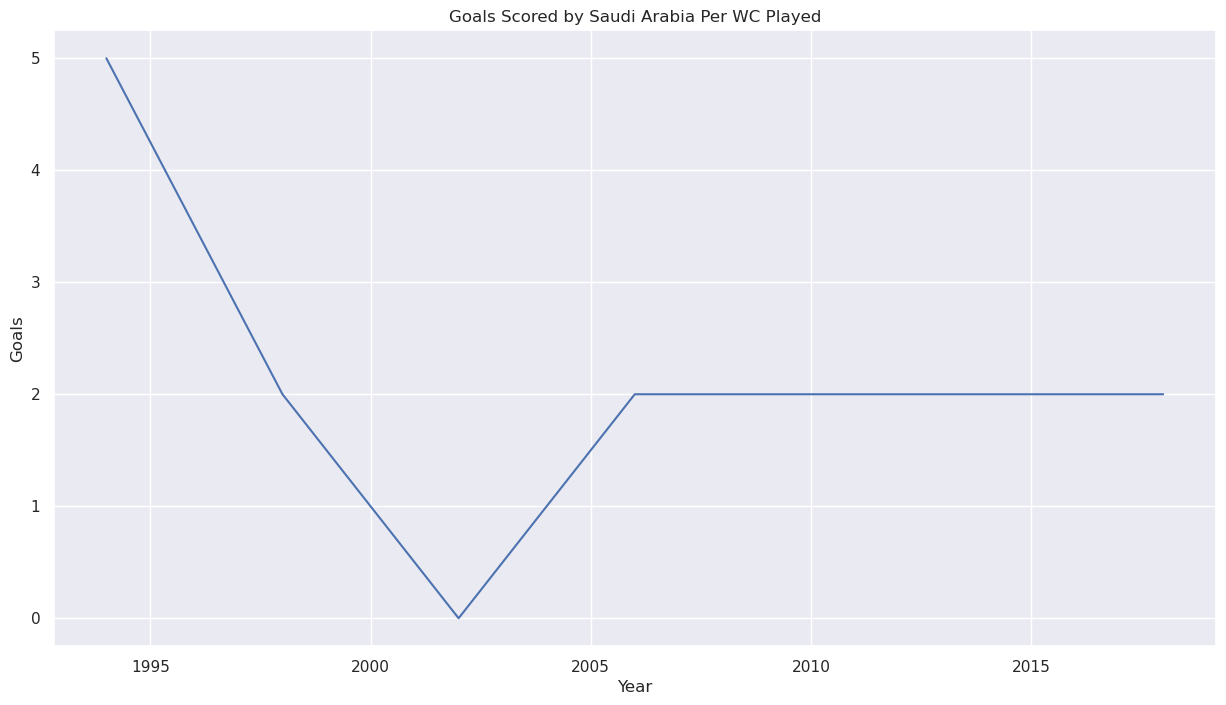

In [64]:
sns.despine(right = True)
g = sns.lineplot(x = 'Year', y = 'Goals', data = cmr_goals)
g.set_title('Goals Scored by Saudi Arabia Per WC Played')
plt.show()

In [45]:
goals = team_goals.groupby(['Country'])['Goals'].sum()

goals

Country
Algeria          13.0
Angola            1.0
Argentina       137.0
Australia        13.0
Austria          43.0
                ...  
Uruguay          87.0
Wales             4.0
West Germany    131.0
Yugoslavia       55.0
Zaire             0.0
Name: Goals, Length: 84, dtype: float64

In [46]:
goals = goals.sort_values(ascending=False)

goals

Country
Brazil                 229.0
Argentina              137.0
West Germany           131.0
Italy                  128.0
France                 120.0
                       ...  
China PR                 0.0
Trinidad and Tobago      0.0
Canada                   0.0
Dutch West Indies        0.0
Zaire                    0.0
Name: Goals, Length: 84, dtype: float64

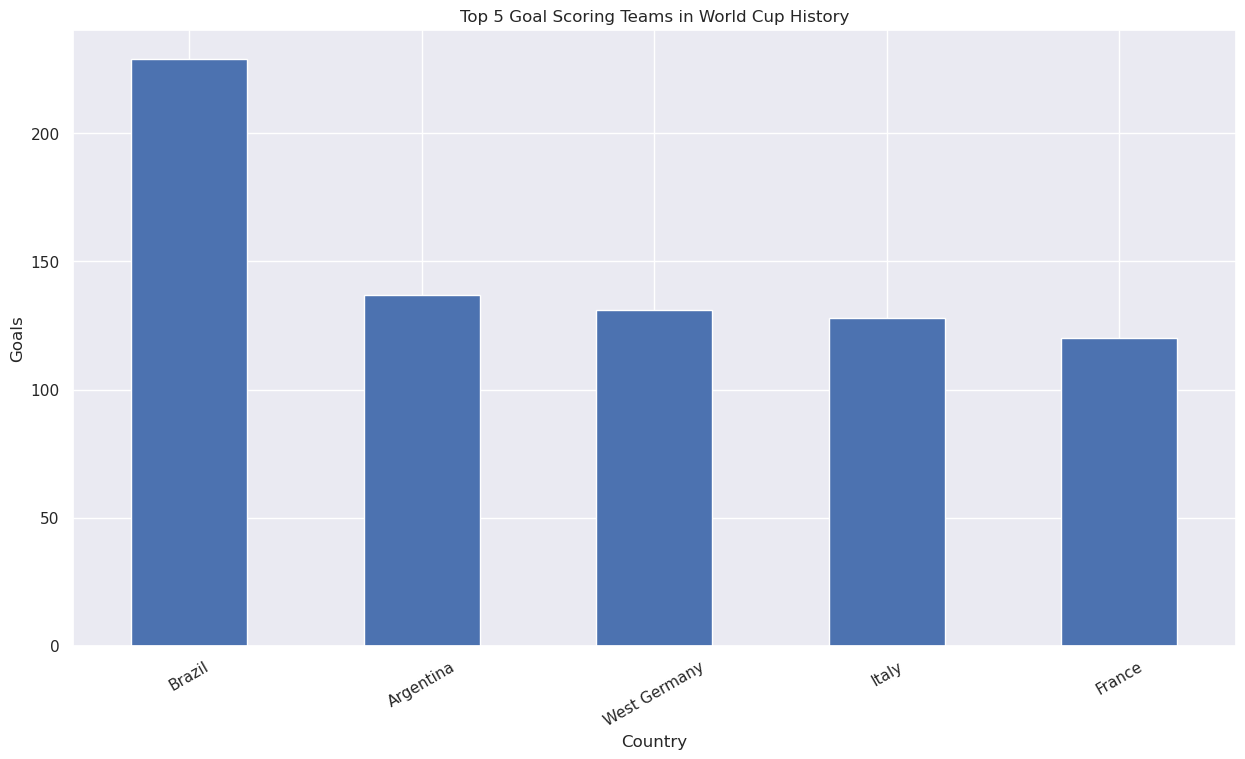

In [63]:
goals[:5].plot(kind="bar")

plt.xlabel('Country')
plt.ylabel('Goals')
plt.title('Top 5 Goal Scoring Teams in World Cup History')
plt.xticks(rotation=30)
plt.show()